In [146]:
!pip install kmodes

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes

In [148]:
df=pd.read_csv("C:/Users/YESHWANTH/Desktop/machine learning using python/voting segmentation/voter.csv")

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CUSTOMERID            200 non-null    int64 
 1   GENDER                200 non-null    object
 2   AGE                   200 non-null    int64 
 3   PROFESSION            200 non-null    object
 4   CATEGORIES            200 non-null    object
 5   MONTHLY INCOME(RS.K)  200 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.5+ KB


In [150]:
df

,CUSTOMERID,GENDER,AGE,PROFESSION,CATEGORIES,MONTHLY INCOME(RS.K)
0,1,Male,19,STUDENTS,ELECTRICITY,10
1,2,Male,21,STUDENTS,ELECTRICITY,10
2,3,Female,20,STUDENTS,ELECTRICITY,13
3,4,Male,23,RESOUCE LABOURS,INFRASTRUCTURE,16
4,5,Male,31,OTHERS,INFRASTRUCTURE,17
...,...,...,...,...,...,...
195,196,Female,35,AGRICULTURE,ROADS,120
196,197,Female,45,AGRICULTURE,ROADS,126
197,198,Male,32,AGRICULTURE,ROADS,126
198,199,Male,32,AGRICULTURE,ROADS,137


In [151]:
df=df.drop(labels=['CUSTOMERID'],axis='columns',inplace=False)
df

,GENDER,AGE,PROFESSION,CATEGORIES,MONTHLY INCOME(RS.K)
0,Male,19,STUDENTS,ELECTRICITY,10
1,Male,21,STUDENTS,ELECTRICITY,10
2,Female,20,STUDENTS,ELECTRICITY,13
3,Male,23,RESOUCE LABOURS,INFRASTRUCTURE,16
4,Male,31,OTHERS,INFRASTRUCTURE,17
...,...,...,...,...,...
195,Female,35,AGRICULTURE,ROADS,120
196,Female,45,AGRICULTURE,ROADS,126
197,Male,32,AGRICULTURE,ROADS,126
198,Male,32,AGRICULTURE,ROADS,137


In [152]:
give_array=df.values

In [153]:
give_array[:,1]= give_array[:,1].astype(float)
give_array[:,4]= give_array[:,1].astype(float)

In [154]:
give_array

array([['Male', 19.0, 'STUDENTS', 'ELECTRICITY', 19.0],
       ['Male', 21.0, 'STUDENTS', 'ELECTRICITY', 21.0],
       ['Female', 20.0, 'STUDENTS', 'ELECTRICITY', 20.0],
       ['Male', 23.0, 'RESOUCE LABOURS', 'INFRASTRUCTURE', 23.0],
       ['Male', 31.0, 'OTHERS', 'INFRASTRUCTURE', 31.0],
       ['Female', 22.0, 'RESOUCE LABOURS', 'INFRASTRUCTURE', 22.0],
       ['Male', 35.0, 'OTHERS', 'INFRASTRUCTURE', 35.0],
       ['Female', 23.0, 'RESOUCE LABOURS', 'INFRASTRUCTURE', 23.0],
       ['Male', 64.0, 'AGRICULTURE', 'ELECTRICITY', 64.0],
       ['Female', 30.0, 'ANIMAL HUSBANDRY', 'WATER', 30.0],
       ['Male', 67.0, 'AGRICULTURE', 'ELECTRICITY', 67.0],
       ['Female', 35.0, 'OTHERS', 'INFRASTRUCTURE', 35.0],
       ['Male', 58.0, 'AGRICULTURE', 'ELECTRICITY', 58.0],
       ['Female', 24.0, 'RESOUCE LABOURS', 'INFRASTRUCTURE', 24.0],
       ['Male', 37.0, 'GOODS TRADERS', 'ROADS', 37.0],
       ['Male', 22.0, 'STUDENTS', 'ELECTRICITY', 22.0],
       ['Female', 35.0, 'OTHERS', 'INFR

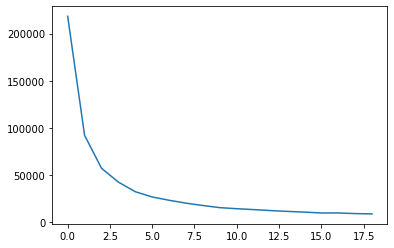

In [170]:
cost = []
for num_clusters in list(range(1,20)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(df, categorical=[0,2,3])
    cost.append(kproto.cost_)

plt.plot(cost)

In [155]:
kproto= KPrototypes(n_clusters=3,verbose=2,max_iter=20)
cluster=kproto.fit_predict(give_array,categorical=[0,2,3])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 30, ncost: 14500.780205585692
Run: 1, iteration: 2/20, moves: 12, ncost: 13828.195549474978
Run: 1, iteration: 3/20, moves: 12, ncost: 13308.283586010502
Run: 1, iteration: 4/20, moves: 4, ncost: 13238.897913576491
Run: 1, iteration: 5/20, moves: 2, ncost: 13208.593312073494
Run: 1, iteration: 6/20, moves: 0, ncost: 13208.593312073494
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 20, ncost: 13199.730178882604
Run: 2, iteration: 2/20, moves: 2, ncost: 13169.884694046686
Run: 2, iteration: 3/20, moves: 2, ncost: 13153.198533590621
Run: 2, iteration: 4/20, moves: 0, ncost: 13153.198533590621
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 70, ncost: 15885.25531906891
Run: 3, iteration: 2/20, moves: 18, ncost: 14970.85042435471
Run: 3, iteration: 3/20,

In [156]:
print(kproto.cluster_centroids_)

[['62.806451612903224' '62.806451612903224' 'Male' 'AGRICULTURE'
  'ELECTRICITY']
 ['28.314285714285713' '28.314285714285713' 'Female' 'RESOUCE LABOURS'
  'INFRASTRUCTURE']
 ['46.546875' '46.546875' 'Male' 'SEA IRRIGATION' 'ELECTRICITY']]


In [157]:
cluster_dict=[]
for c in cluster:
      cluster_dict.append(c)

In [158]:
df['cluster']=cluster_dict

In [159]:
df

,GENDER,AGE,PROFESSION,CATEGORIES,MONTHLY INCOME(RS.K),cluster
0,Male,19,STUDENTS,ELECTRICITY,10,1
1,Male,21,STUDENTS,ELECTRICITY,10,1
2,Female,20,STUDENTS,ELECTRICITY,13,1
3,Male,23,RESOUCE LABOURS,INFRASTRUCTURE,16,1
4,Male,31,OTHERS,INFRASTRUCTURE,17,1
...,...,...,...,...,...,...
195,Female,35,AGRICULTURE,ROADS,120,1
196,Female,45,AGRICULTURE,ROADS,126,2
197,Male,32,AGRICULTURE,ROADS,126,1
198,Male,32,AGRICULTURE,ROADS,137,1


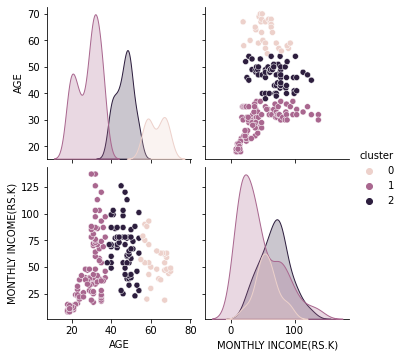

In [166]:
sns.pairplot(df,hue='cluster')

In [160]:
df[df['cluster']==1].head(10)

,GENDER,AGE,PROFESSION,CATEGORIES,MONTHLY INCOME(RS.K),cluster
0,Male,19,STUDENTS,ELECTRICITY,10,1
1,Male,21,STUDENTS,ELECTRICITY,10,1
2,Female,20,STUDENTS,ELECTRICITY,13,1
3,Male,23,RESOUCE LABOURS,INFRASTRUCTURE,16,1
4,Male,31,OTHERS,INFRASTRUCTURE,17,1
5,Female,22,RESOUCE LABOURS,INFRASTRUCTURE,24,1
6,Male,35,OTHERS,INFRASTRUCTURE,18,1
7,Female,23,RESOUCE LABOURS,INFRASTRUCTURE,23,1
9,Female,30,ANIMAL HUSBANDRY,WATER,19,1
11,Female,35,OTHERS,INFRASTRUCTURE,19,1


In [161]:
df[df['cluster']==0].head(40)

,GENDER,AGE,PROFESSION,CATEGORIES,MONTHLY INCOME(RS.K),cluster
8,Male,64,AGRICULTURE,ELECTRICITY,39,0
10,Male,67,AGRICULTURE,ELECTRICITY,19,0
12,Male,58,AGRICULTURE,ELECTRICITY,20,0
30,Male,60,AGRICULTURE,ELECTRICITY,30,0
40,Female,65,AGRICULTURE,ELECTRICITY,38,0
53,Male,59,AGRICULTURE,ELECTRICITY,43,0
57,Male,69,GOODS TRADERS,ROADS,44,0
60,Male,70,AGRICULTURE,ELECTRICITY,46,0
62,Female,67,GOODS TRADERS,ROADS,47,0
64,Male,63,AGRICULTURE,ELECTRICITY,48,0


In [162]:
df[df['cluster']==2].head(10)

,GENDER,AGE,PROFESSION,CATEGORIES,MONTHLY INCOME(RS.K),cluster
18,Male,52,AGRICULTURE,ELECTRICITY,23,2
22,Male,46,SEA IRRIGATION,WATER,25,2
24,Female,54,AGRICULTURE,ELECTRICITY,28,2
26,Male,45,SEA IRRIGATION,WATER,28,2
28,Female,40,GOVT SERVENTS,ROADS,49,2
32,Male,53,AGRICULTURE,ELECTRICITY,33,2
34,Male,49,SEA IRRIGATION,WATER,33,2
42,Male,48,SEA IRRIGATION,WATER,39,2
44,Female,49,SEA IRRIGATION,WATER,39,2
46,Female,50,AGRICULTURE,ELECTRICITY,40,2


AttributeError: module 'matplotlib.pyplot' has no attribute 'Xl'

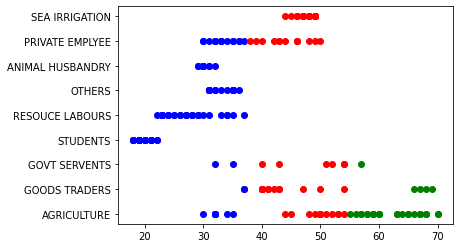

In [163]:
df1 =df[df.cluster==0]
df2 =df[df.cluster==1]
df3 =df[df.cluster==2]

plt.scatter(df1.AGE,df1['PROFESSION'], color='green')
plt.scatter(df2.AGE,df2['PROFESSION'],color='blue')
plt.scatter(df3.AGE,df3['PROFESSION'],color='red')
plt.Xl('AGE')
plt.y1('PROFESSION')
plt.legend()

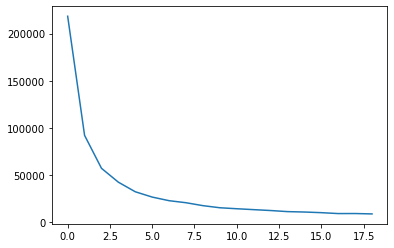

In [169]:
cost = []
for num_clusters in list(range(1,20)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(df, categorical=[0,2,3])
    cost.append(kproto.cost_)

plt.plot(cost)